<a href="https://colab.research.google.com/github/JolavoJoestar/calculadora-gastos/blob/main/ProjetoDMD_Alan_Arthur_Olavo_(CORRETO).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Curso:** Design de Mídias Digitais

**Matéria:** Programacao para Ambientes Multimidia II

**Professor:** Luiz Sergio de Souza

**Alunos:**

Alan Sousa Stalin Bueno - RA: 1431302221009

Arthur Paes Teodoro dos Reis Brito - RA: 1431302221016

Olavo Marcos da Silva Junior - RA: 1431302221002

**Banco de dados utilizado:** https://opendatasus.saude.gov.br/dataset/distribuicao-de-equipamentos-de-protecao-individual-e-insumos-covid-19

**Tema do dataset:** Distribuição de Equipamentos de Proteção Individual e Insumos– Covid- 19

Esta base de dados possui informações sobre os equipamentos de proteção individual (EPI) e insumos de saúde distribuídos em razão do combate à emergência de saúde pública de importância internacional decorrente da Covid-19.

**Dicionário de dados:**

-Material: bem entregue;

-Dt.Saída: data de saída para entrega;

-Nº Pedido: número do pedido;

-Requisitante / Destino: Estado de destino;

-Unidade: unidade de medida;

-Quantidade: quantidade entregue;

-Status: status da entrega.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_excel("/content/drive/MyDrive/ColabNotebooks/PMM2/dist_epi.xlsx")

In [ ]:
df.shape

(7055, 7)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7055 entries, 0 to 7054
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Material                7055 non-null   object        
 1   Dt.Saída                7055 non-null   datetime64[ns]
 2   Nº Pedido               7055 non-null   int64         
 3   Requisitante / Destino  7055 non-null   object        
 4   Unidade                 7055 non-null   object        
 5   Quantidade              7055 non-null   float64       
 6   Status                  7055 non-null   object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(4)
memory usage: 385.9+ KB


In [ ]:
df.isna().any()

,0
Material,False
Dt.Saída,False
Nº Pedido,False
Requisitante / Destino,False
Unidade,False
Quantidade,False
Status,False


In [ ]:
df.head()

,Material,Dt.Saída,Nº Pedido,Requisitante / Destino,Unidade,Quantidade,Status
0,Álcool,2020-03-19,308748,Acre,Litro,9.6,Entregue
1,Álcool,2020-03-19,308748,Acre,Litro,42.0,Entregue
2,Álcool,2020-03-19,308499,Acre,Litro,12.0,Entregue
3,Álcool,2020-03-19,308500,Acre,Litro,12.0,Entregue
4,Álcool,2020-03-25,309483,Acre,Litro,48.0,Entregue


In [ ]:
df.tail()

,Material,Dt.Saída,Nº Pedido,Requisitante / Destino,Unidade,Quantidade,Status
7050,Sapatilha e Touca,2021-03-24,345726,Maranhão,Unidade,2500.0,Entregue
7051,Sapatilha e Touca,2021-03-24,345726,Maranhão,Unidade,100.0,Entregue
7052,Sapatilha e Touca,2021-03-24,345986,Piauí,Unidade,2900.0,Entregue
7053,Sapatilha e Touca,2021-02-26,343288,Rondônia,Unidade,200.0,Entregue
7054,Sapatilha e Touca,2021-03-24,346062,Santa Catarina,Unidade,700.0,Entregue


In [ ]:
df.value_counts("Status")

,count
Status,
Entregue,7055


Acima o total de pedidos realizados

In [ ]:
df.value_counts("Material")

,count
Material,
Máscara Cirúrgica,1657
Máscara N95,1258
Óculos e Protetor Facial,1080
Luva,1055
Sapatilha e Touca,858
Álcool,575
Avental,572


Acima podemos saber a quantidade de pedidos feitos de cada um dos materiais

In [ ]:
import pandas as pd
df.groupby(by='Material')['Quantidade'].sum()

,Quantidade
Material,
Avental,3249178.0
Luva,39990500.0
Máscara Cirúrgica,260962490.0
Máscara N95,34661075.0
Sapatilha e Touca,21294700.0
Álcool,564936.8
Óculos e Protetor Facial,2995608.0


Acima podemos ver quanto foi pedido de cada um dos materiais.

OBS.: Álcool é medido em litros ao invés de unidades.

In [ ]:
import pandas as pd

material_counts = df.groupby(['Requisitante / Destino'])['Material'].value_counts().reset_index(name='Frequencia')

average_frequency = material_counts.groupby(['Requisitante / Destino'])['Frequencia'].mean().reset_index(name='Média da Frequência')

print(average_frequency)

    Requisitante / Destino  Média da Frequência
0                     Acre            29.428571
1                  Alagoas            24.857143
2                    Amapá            25.714286
3                 Amazonas            26.428571
4                    Bahia            26.571429
5                    Ceará            26.857143
6         Distrito Federal            19.857143
7           Espírito Santo            26.571429
8                    Goiás            26.142857
9                 Maranhão            28.142857
10             Mato Grosso            27.000000
11      Mato Grosso do Sul            26.857143
12            Minas Gerais            25.857143
13  Outros Órgãos Federais           291.571429
14                  Paraná            26.571429
15                 Paraíba            26.428571
16                    Pará            29.857143
17              Pernambuco            24.571429
18                   Piauí            27.142857
19     Rio Grande do Norte            26

Acima temos insights sobre a frequência média com que diferentes materiais são solicitados por cada um dos estados do Brasil. Com essas informações podemos compreender os padrões de demanda de cada estado.

OBS.: "Outros Órgãos Federais" são entidades da administração pública federal brasileira que não se enquadram como ministérios, autarquias ou fundações públicas. Por desempenharem funções específicas e possuírem autonomia administrativa e financeira (e por serem muitos em nosso país) eles acabam tendo uma grande demanda de recursos.

**Região Centro-Oeste**

In [ ]:
import pandas as pd

estados_centro_oeste = ['Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul']
filtered_df = df[df['Requisitante / Destino'].isin(estados_centro_oeste)]

pivot_table = pd.pivot_table(
    filtered_df,
    values='Quantidade',
    index='Material',
    columns='Requisitante / Destino',
    aggfunc='sum',
    fill_value=0)

print(pivot_table)

Requisitante / Destino    Distrito Federal      Goiás  Mato Grosso  \
Material                                                             
Avental                            46538.0    88123.0      44978.0   
Luva                              391600.0   722800.0     446100.0   
Máscara Cirúrgica                4243400.0  7604550.0    4067350.0   
Máscara N95                       636050.0  1030100.0     548910.0   
Sapatilha e Touca                 320600.0   659400.0     341800.0   
Álcool                              8145.5    14408.5       7716.0   
Óculos e Protetor Facial           46490.0    96288.0      54050.0   

Requisitante / Destino    Mato Grosso do Sul  
Material                                      
Avental                              44367.0  
Luva                                335600.0  
Máscara Cirúrgica                  3939950.0  
Máscara N95                         563000.0  
Sapatilha e Touca                   299500.0  
Álcool                                80

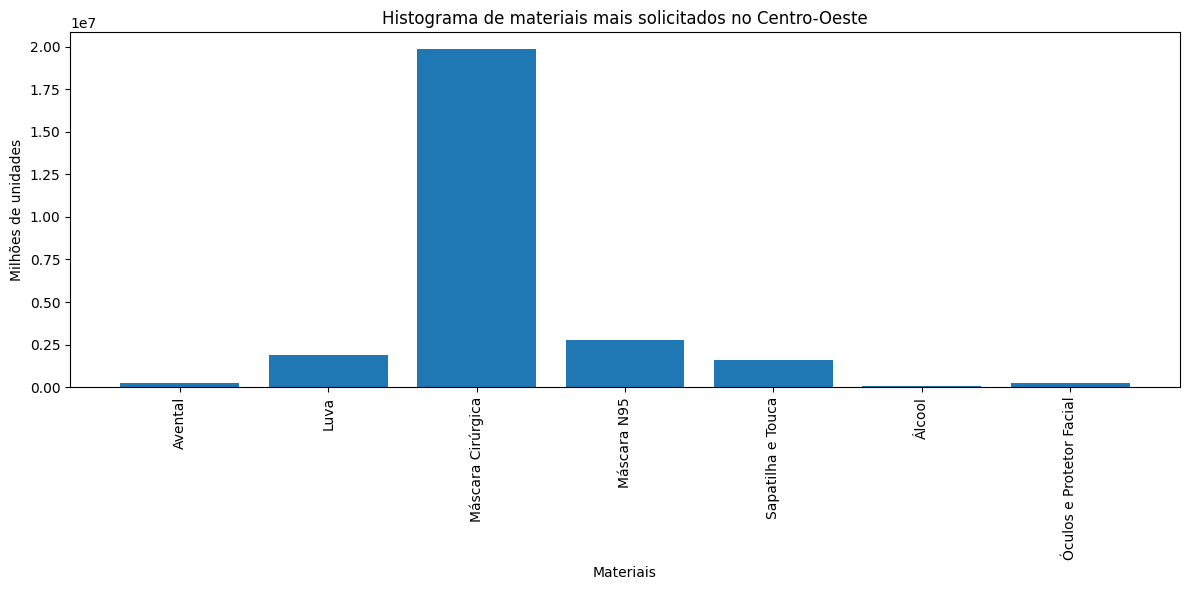

In [4]:
import pandas as pd
import matplotlib.pyplot as plt

estados_selecionados = ['Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul']
df_filtrado = df[df['Requisitante / Destino'].isin(estados_selecionados)]

material_quantidade = df_filtrado.groupby('Material')['Quantidade'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(material_quantidade['Material'], material_quantidade['Quantidade'])
plt.xlabel('Materiais')
plt.ylabel('Milhões de unidades')
plt.title('Histograma de materiais mais solicitados no Centro-Oeste')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

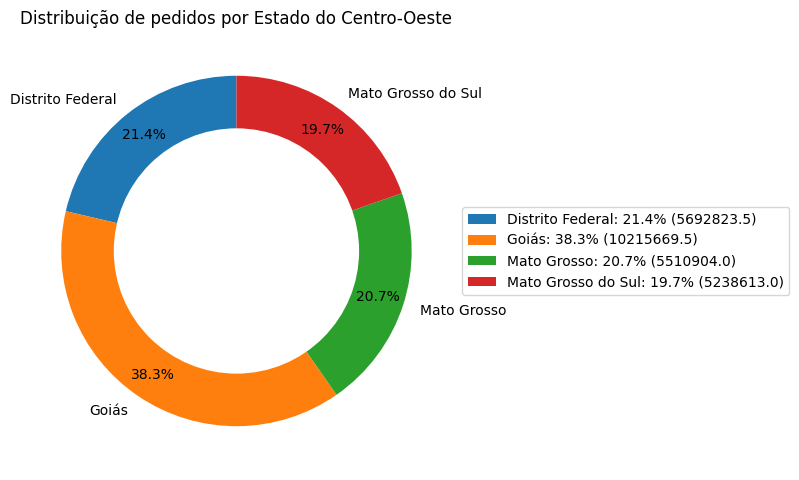

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

estados_centro_oeste = ['Distrito Federal', 'Goiás', 'Mato Grosso', 'Mato Grosso do Sul']

df_centro_oeste = df[df['Requisitante / Destino'].isin(estados_centro_oeste)]

estado_quantidade = df_centro_oeste.groupby('Requisitante / Destino')['Quantidade'].sum().reset_index()

total_pedidos = estado_quantidade['Quantidade'].sum()
estado_quantidade['Porcentagem'] = (estado_quantidade['Quantidade'] / total_pedidos) * 100

plt.figure(figsize=(8, 8))
plt.pie(estado_quantidade['Quantidade'], labels=estado_quantidade['Requisitante / Destino'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Distribuição de pedidos por Estado do Centro-Oeste')

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

legendas = [f'{estado}: {porcentagem:.1f}% ({quantidade})' for estado, porcentagem, quantidade in zip(estado_quantidade['Requisitante / Destino'], estado_quantidade['Porcentagem'], estado_quantidade['Quantidade'])]
plt.legend(legendas, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

**Região Nordeste**

In [ ]:
import pandas as pd

estados_nordeste = ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe']
filtered_df = df[df['Requisitante / Destino'].isin(estados_nordeste)]

pivot_table = pd.pivot_table(
    filtered_df,
    values='Quantidade',
    index='Material',
    columns='Requisitante / Destino',
    aggfunc='sum',
    fill_value=0)

print(pivot_table)

Requisitante / Destino      Alagoas       Bahia       Ceará   Maranhão  \
Material                                                                 
Avental                     41730.0    198379.0    109709.0    90222.0   
Luva                       388300.0   1666400.0    982000.0   744300.0   
Máscara Cirúrgica         3879950.0  18448000.0  10631100.0  8984050.0   
Máscara N95                520750.0   2431800.0   1390800.0  1217950.0   
Sapatilha e Touca          322900.0   1470200.0    869300.0   697200.0   
Álcool                       7468.0     34060.9     18732.8    15507.0   
Óculos e Protetor Facial    48580.0    225000.0    126690.0   110600.0   

Requisitante / Destino      Paraíba  Pernambuco      Piauí  \
Material                                                     
Avental                     57421.0    124309.0    45787.0   
Luva                       586700.0   1073400.0   387400.0   
Máscara Cirúrgica         5680050.0  11519200.0  4487250.0   
Máscara N95            

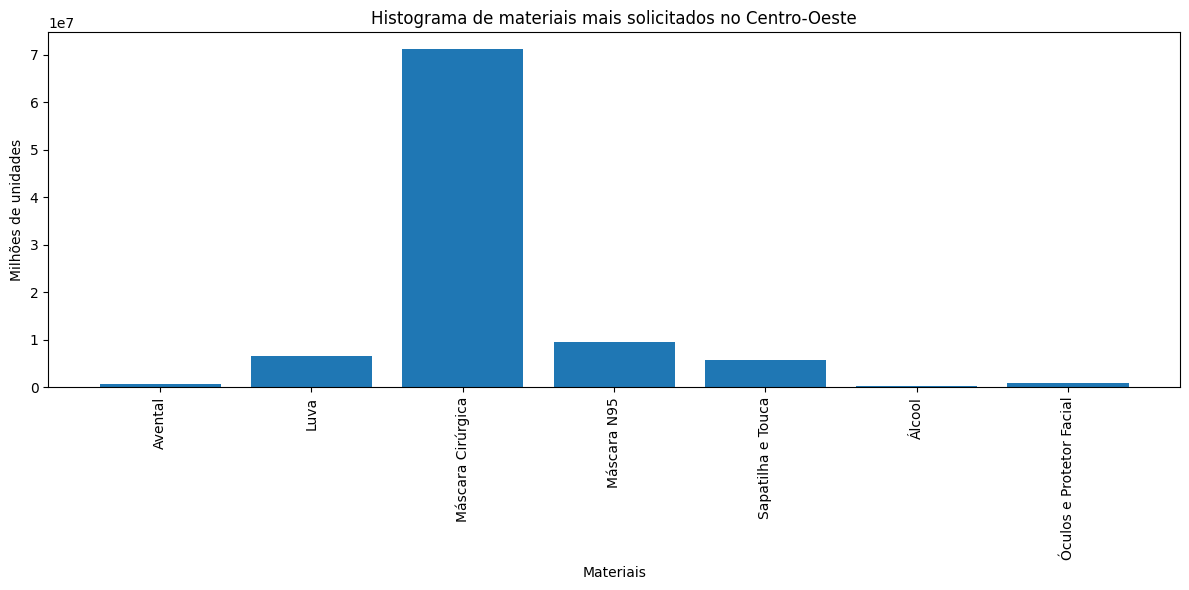

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

estados_selecionados = ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe']
df_filtrado = df[df['Requisitante / Destino'].isin(estados_selecionados)]

material_quantidade = df_filtrado.groupby('Material')['Quantidade'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(material_quantidade['Material'], material_quantidade['Quantidade'])
plt.xlabel('Materiais')
plt.ylabel('Milhões de unidades')
plt.title('Histograma de materiais mais solicitados no Centro-Oeste')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

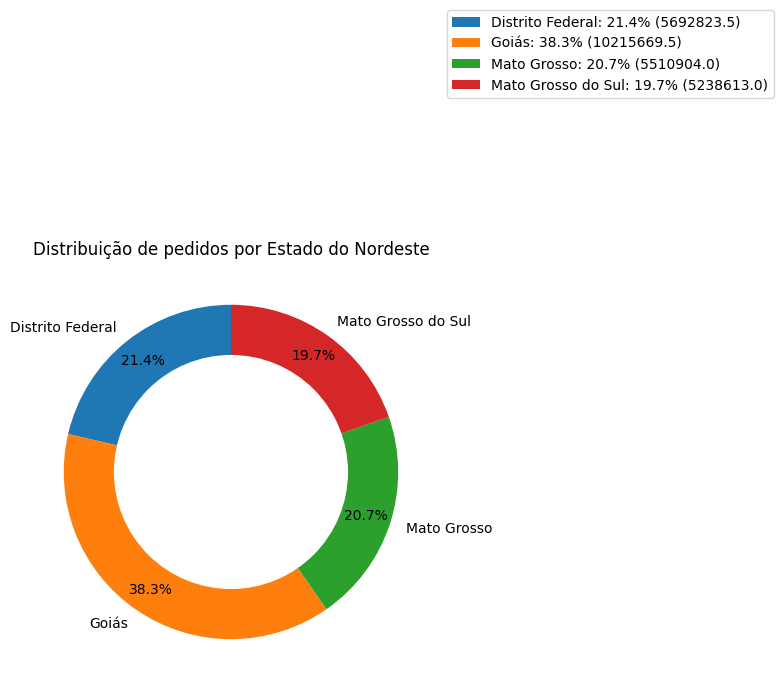

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

estados_nordeste = ['Alagoas', 'Bahia', 'Ceará', 'Maranhão', 'Paraíba', 'Pernambuco', 'Piauí', 'Rio Grande do Norte', 'Sergipe']

df_nordeste = df[df['Requisitante / Destino'].isin(estados_nordeste)]

estado_quantidade = df_centro_oeste.groupby('Requisitante / Destino')['Quantidade'].sum().reset_index()

total_pedidos = estado_quantidade['Quantidade'].sum()
estado_quantidade['Porcentagem'] = (estado_quantidade['Quantidade'] / total_pedidos) * 100

plt.figure(figsize=(8, 8))
plt.pie(estado_quantidade['Quantidade'], labels=estado_quantidade['Requisitante / Destino'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Distribuição de pedidos por Estado do Nordeste')

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

legendas = [f'{estado}: {porcentagem:.1f}% ({quantidade})' for estado, porcentagem, quantidade in zip(estado_quantidade['Requisitante / Destino'], estado_quantidade['Porcentagem'], estado_quantidade['Quantidade'])]
plt.legend(legendas, loc='center left', bbox_to_anchor=(1, 1.5))

plt.tight_layout()
plt.show()

**Região Norte**

In [ ]:
import pandas as pd

estados_norte = ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins']
filtered_df = df[df['Requisitante / Destino'].isin(estados_norte)]

pivot_table = pd.pivot_table(
    filtered_df,
    values='Quantidade',
    index='Material',
    columns='Requisitante / Destino',
    aggfunc='sum',
    fill_value=0)

print(pivot_table)

Requisitante / Destino         Acre      Amapá   Amazonas       Pará  \
Material                                                               
Avental                     13883.0    13574.0   181013.0   135227.0   
Luva                       133700.0   286800.0   665700.0   869100.0   
Máscara Cirúrgica         1365750.0  1199550.0  5502750.0  8432750.0   
Máscara N95                258400.0   156650.0   815800.0  1156200.0   
Sapatilha e Touca          114700.0   154900.0   716200.0   811700.0   
Álcool                       2429.9     2333.7    19920.5    15037.8   
Óculos e Protetor Facial    16220.0    14940.0    68990.0   103268.0   

Requisitante / Destino     Rondônia    Roraima  Tocantins  
Material                                                   
Avental                     85924.0     9599.0    29358.0  
Luva                       228900.0    73200.0   219500.0  
Máscara Cirúrgica         2262350.0  1026050.0  2851580.0  
Máscara N95                329000.0   140100.0   48

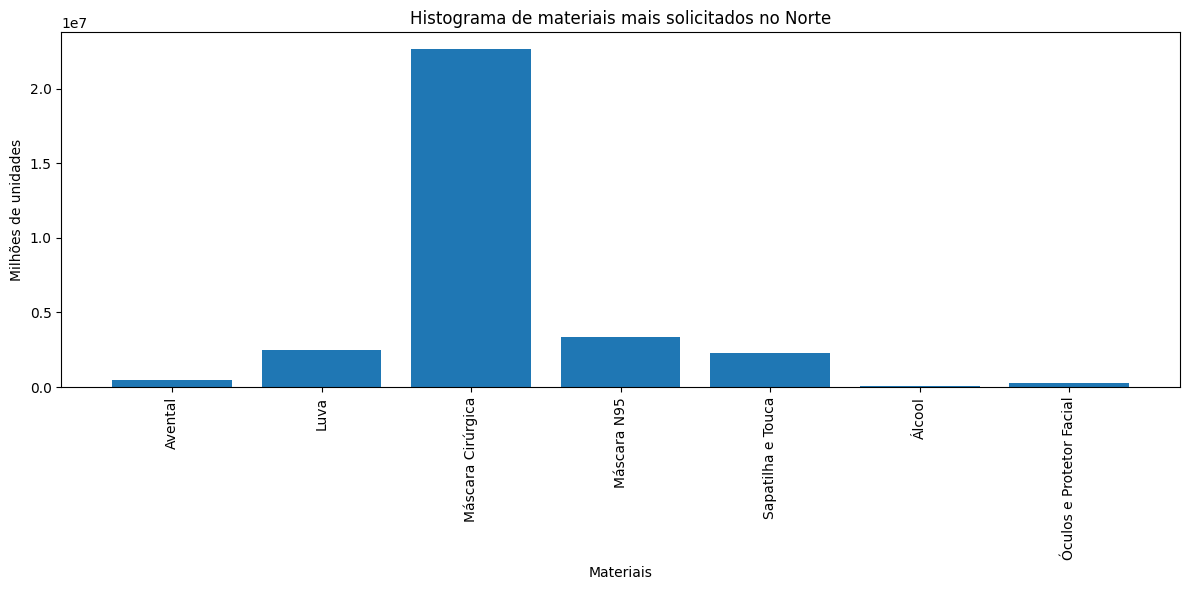

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

estados_norte = ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins']
df_filtrado = df[df['Requisitante / Destino'].isin(estados_norte)]

material_quantidade = df_filtrado.groupby('Material')['Quantidade'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(material_quantidade['Material'], material_quantidade['Quantidade'])
plt.xlabel('Materiais')
plt.ylabel('Milhões de unidades')
plt.title('Histograma de materiais mais solicitados no Norte')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

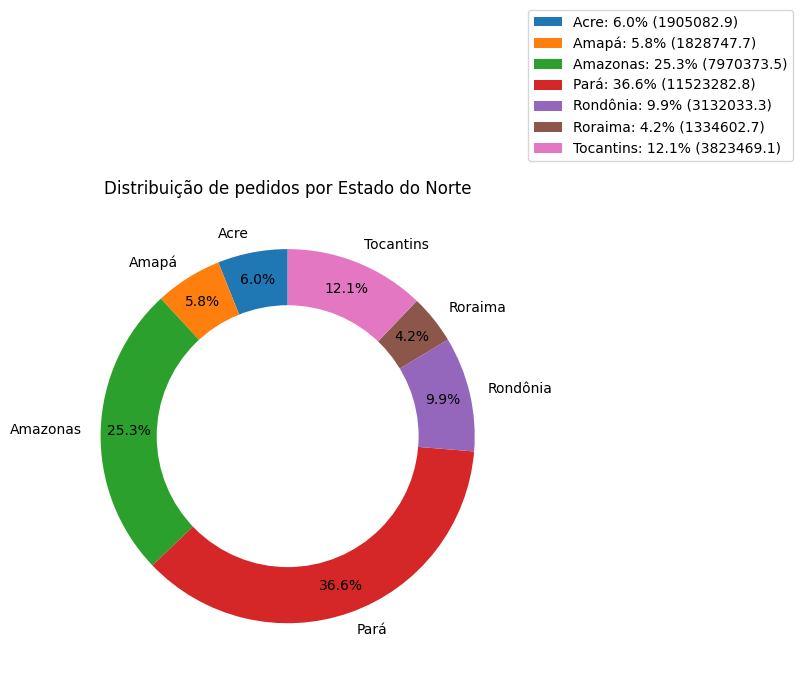

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

estados_norte = ['Acre', 'Amapá', 'Amazonas', 'Pará', 'Rondônia', 'Roraima', 'Tocantins']

df_norte = df[df['Requisitante / Destino'].isin(estados_norte)]

estado_quantidade = df_norte.groupby('Requisitante / Destino')['Quantidade'].sum().reset_index()

total_pedidos = estado_quantidade['Quantidade'].sum()
estado_quantidade['Porcentagem'] = (estado_quantidade['Quantidade'] / total_pedidos) * 100

plt.figure(figsize=(8, 8))
plt.pie(estado_quantidade['Quantidade'], labels=estado_quantidade['Requisitante / Destino'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Distribuição de pedidos por Estado do Norte')

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

legendas = [f'{estado}: {porcentagem:.1f}% ({quantidade})' for estado, porcentagem, quantidade in zip(estado_quantidade['Requisitante / Destino'], estado_quantidade['Porcentagem'], estado_quantidade['Quantidade'])]
plt.legend(legendas, loc='center left', bbox_to_anchor=(1, 1.25))

plt.tight_layout()
plt.show()

**Região Sudeste**

In [ ]:
import pandas as pd

estados_sudeste = ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo']
filtered_df = df[df['Requisitante / Destino'].isin(estados_sudeste)]

pivot_table = pd.pivot_table(
    filtered_df,
    values='Quantidade',
    index='Material',
    columns='Requisitante / Destino',
    aggfunc='sum',
    fill_value=0)

print(pivot_table)

Requisitante / Destino    Espírito Santo  Minas Gerais  Rio de Janeiro  \
Material                                                                 
Avental                          55135.0      307269.0         93965.0   
Luva                            450200.0     2556300.0       2997200.0   
Máscara Cirúrgica              4655850.0    26157000.0      18492350.0   
Máscara N95                     658700.0     3608350.0       2741950.0   
Sapatilha e Touca               405900.0     2110100.0       1565900.0   
Álcool                            9844.4       55939.4         39633.4   
Óculos e Protetor Facial         56620.0      333370.0        156185.0   

Requisitante / Destino     São Paulo  
Material                              
Avental                     613467.0  
Luva                       5395400.0  
Máscara Cirúrgica         37981250.0  
Máscara N95                5542800.0  
Sapatilha e Touca          4198000.0  
Álcool                      115851.4  
Óculos e Protetor Fac

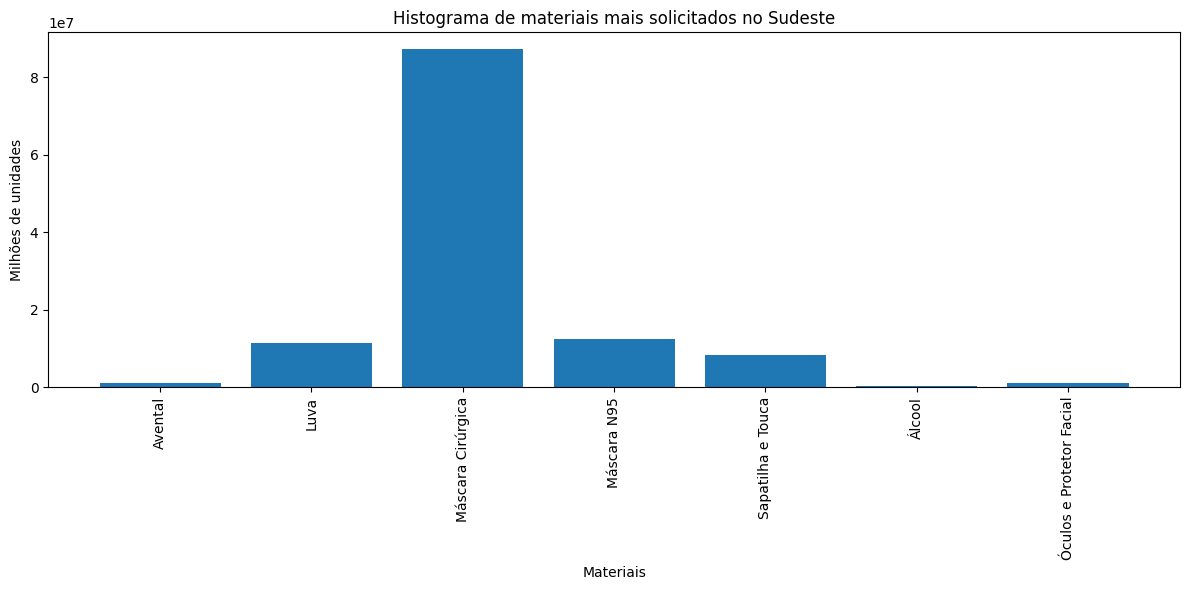

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

estados_sudeste = ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo']
df_filtrado = df[df['Requisitante / Destino'].isin(estados_sudeste)]

material_quantidade = df_filtrado.groupby('Material')['Quantidade'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(material_quantidade['Material'], material_quantidade['Quantidade'])
plt.xlabel('Materiais')
plt.ylabel('Milhões de unidades')
plt.title('Histograma de materiais mais solicitados no Sudeste')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

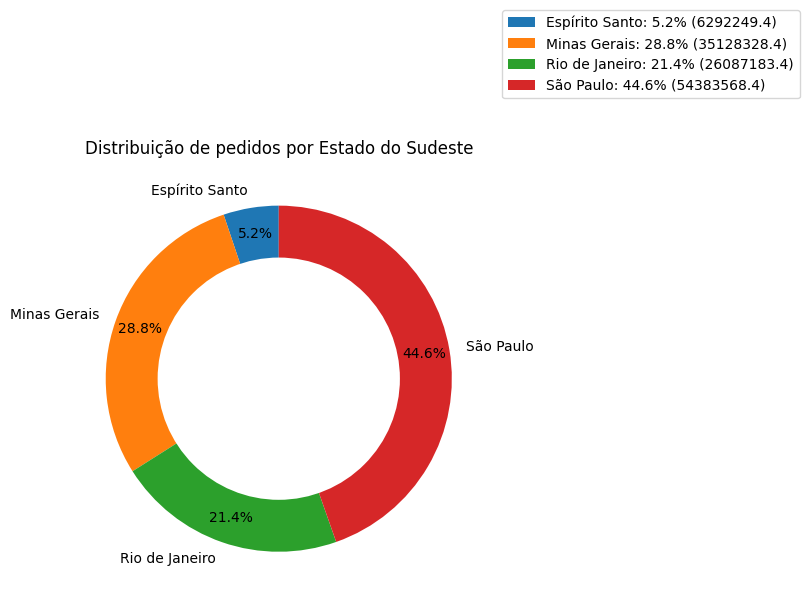

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

estados_sudeste = ['Espírito Santo', 'Minas Gerais', 'Rio de Janeiro', 'São Paulo']

df_sudeste = df[df['Requisitante / Destino'].isin(estados_sudeste)]

estado_quantidade = df_sudeste.groupby('Requisitante / Destino')['Quantidade'].sum().reset_index()

total_pedidos = estado_quantidade['Quantidade'].sum()
estado_quantidade['Porcentagem'] = (estado_quantidade['Quantidade'] / total_pedidos) * 100

plt.figure(figsize=(8, 8))
plt.pie(estado_quantidade['Quantidade'], labels=estado_quantidade['Requisitante / Destino'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Distribuição de pedidos por Estado do Sudeste')

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

legendas = [f'{estado}: {porcentagem:.1f}% ({quantidade})' for estado, porcentagem, quantidade in zip(estado_quantidade['Requisitante / Destino'], estado_quantidade['Porcentagem'], estado_quantidade['Quantidade'])]
plt.legend(legendas, loc='center left', bbox_to_anchor=(1, 1.25))

plt.tight_layout()
plt.show()

**Região Sul**

In [ ]:
import pandas as pd

estados_sul = ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
filtered_df = df[df['Requisitante / Destino'].isin(estados_sul)]

pivot_table = pd.pivot_table(
    filtered_df,
    values='Quantidade',
    index='Material',
    columns='Requisitante / Destino',
    aggfunc='sum',
    fill_value=0)

print(pivot_table)

Requisitante / Destino        Paraná  Rio Grande do Sul  Santa Catarina
Material                                                               
Avental                     150580.0           157999.0         94539.0
Luva                       1393600.0          1468100.0        812000.0
Máscara Cirúrgica         12951600.0         12569950.0       8256150.0
Máscara N95                1962950.0          1874800.0       1259500.0
Sapatilha e Touca          1123700.0          1110000.0        710800.0
Álcool                       28310.6            31980.8         18152.3
Óculos e Protetor Facial    166030.0           166450.0        107830.0


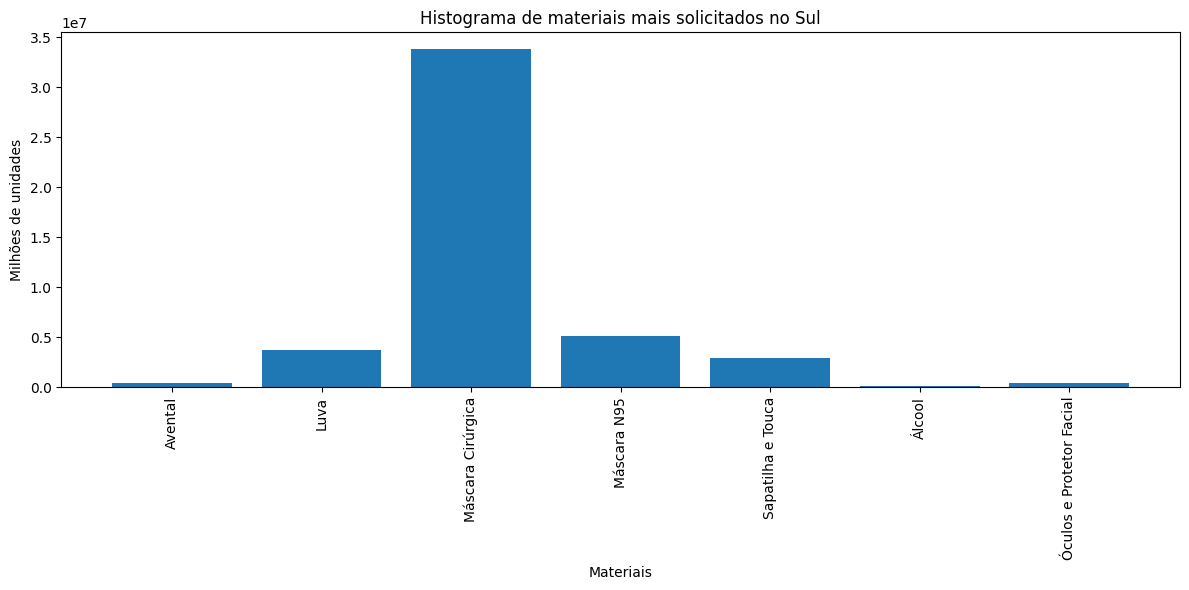

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

estados_sul = ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']
df_filtrado = df[df['Requisitante / Destino'].isin(estados_sul)]

material_quantidade = df_filtrado.groupby('Material')['Quantidade'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(material_quantidade['Material'], material_quantidade['Quantidade'])
plt.xlabel('Materiais')
plt.ylabel('Milhões de unidades')
plt.title('Histograma de materiais mais solicitados no Sul')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

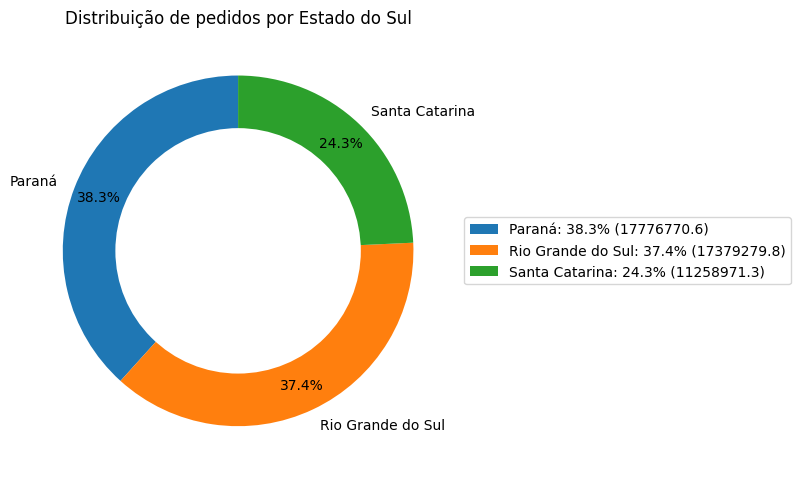

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

estados_sul = ['Paraná', 'Rio Grande do Sul', 'Santa Catarina']

df_sul = df[df['Requisitante / Destino'].isin(estados_sul)]

estado_quantidade = df_sul.groupby('Requisitante / Destino')['Quantidade'].sum().reset_index()

total_pedidos = estado_quantidade['Quantidade'].sum()
estado_quantidade['Porcentagem'] = (estado_quantidade['Quantidade'] / total_pedidos) * 100

plt.figure(figsize=(8, 8))
plt.pie(estado_quantidade['Quantidade'], labels=estado_quantidade['Requisitante / Destino'], autopct='%1.1f%%', startangle=90, pctdistance=0.85)
plt.title('Distribuição de pedidos por Estado do Sul')

centre_circle = plt.Circle((0, 0), 0.70, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

legendas = [f'{estado}: {porcentagem:.1f}% ({quantidade})' for estado, porcentagem, quantidade in zip(estado_quantidade['Requisitante / Destino'], estado_quantidade['Porcentagem'], estado_quantidade['Quantidade'])]
plt.legend(legendas, loc='center left', bbox_to_anchor=(1, 0.5))

plt.tight_layout()
plt.show()

**Outros Órgãos Federais**

In [ ]:
import pandas as pd

outros_orgaos_df = df[df['Requisitante / Destino'] == 'Outros Órgãos Federais']

material_pivot_outros_orgaos = pd.pivot_table(
    outros_orgaos_df,
    values='Quantidade',
    index='Material',
    aggfunc='sum',
    fill_value=0
)

print(material_pivot_outros_orgaos)

                          Quantidade
Material                            
Avental                     335013.0
Luva                      14058100.0
Máscara Cirúrgica         26202870.0
Máscara N95                1355901.0
Sapatilha e Touca           546600.0
Álcool                       47081.9
Óculos e Protetor Facial     63589.0


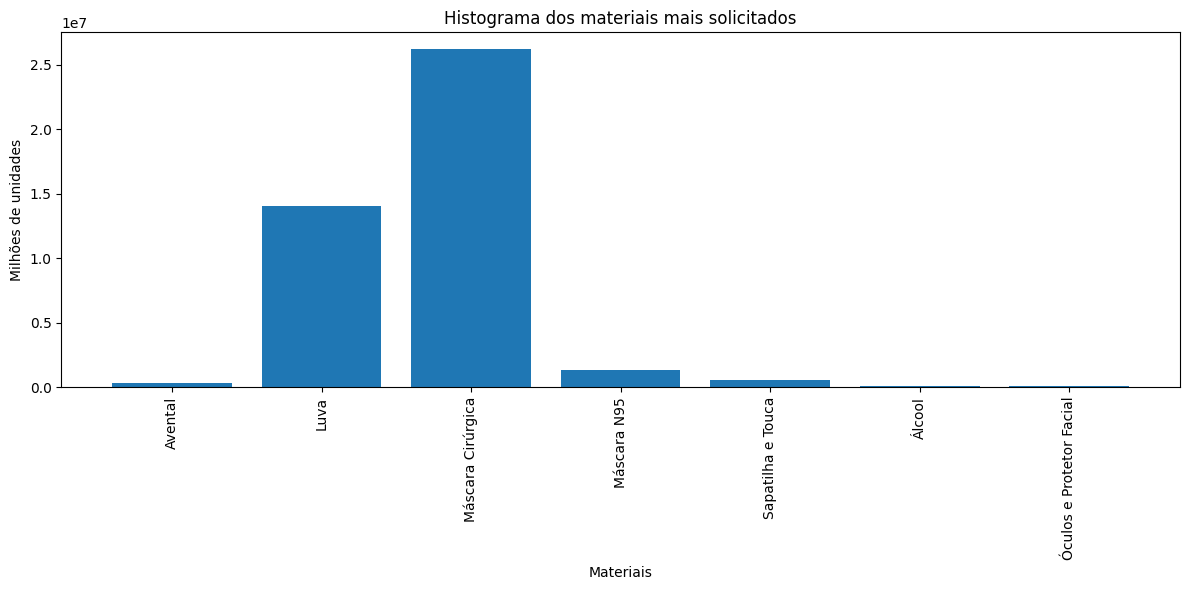

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

o_o_f = ['Outros Órgãos Federais']
df_filtrado = df[df['Requisitante / Destino'].isin(o_o_f)]

material_quantidade = df_filtrado.groupby('Material')['Quantidade'].sum().reset_index()

plt.figure(figsize=(12, 6))
plt.bar(material_quantidade['Material'], material_quantidade['Quantidade'])
plt.xlabel('Materiais')
plt.ylabel('Milhões de unidades')
plt.title('Histograma dos materiais mais solicitados')
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

**Outros dados e inferências com base nos dados analisados**

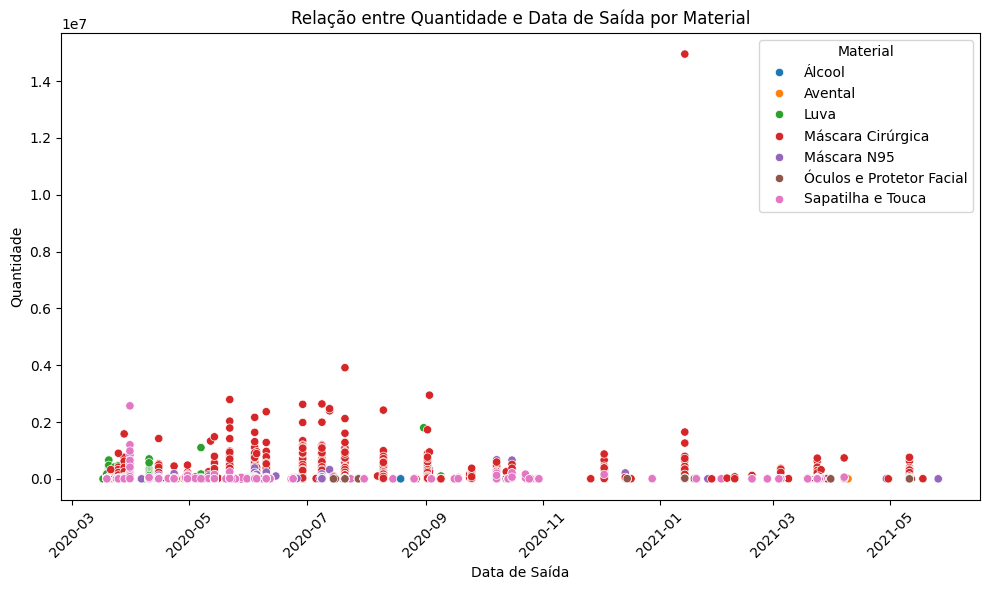

In [ ]:
df['Dt.Saída'] = pd.to_datetime(df['Dt.Saída'], errors='coerce')

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Dt.Saída', y='Quantidade', hue='Material')
plt.title('Relação entre Quantidade e Data de Saída por Material')
plt.xlabel('Data de Saída')
plt.ylabel('Quantidade')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

**Conclusão**

* O aumento de máscaras cirúrgicas no primeiro mês de 2021, mostra que a população adotou uma postura mais séria frente à pandemia de COVID-19 que estava prestes a atingir seu auge de fatalidades em março de 2021.

* Podemos inferir que o grande número de máscaras cirúrgicas solicitadas ao longo do período analisado se deve à pandemia de COVID-19.

* É observável também a correlação entre o número da população com relação ao pedido de máscaras cirúrgicas, observado que os estados com maior população tem um maior número de pedidos gerais e maior número de máscaras cirúrgicas em comparativo com os outros materiais, pois os mesmos alêm de serem constantementes trocados pelos profissionais atuantes, eram distribuidos para a população geral como metódo de prevenção.

* Outros órgãos federais, representam uma parte significativa da demanda por materiais, o que destaca a importância desses órgãos na resposta à pandemia.

* Analisar esses dados pode ser útil para prever necessidades futuras em situações similares, otimizando o planejamento dos estoques.


**Exercícios:**

**1. Definição de Objetivos e Escopo do Projeto**

A área escolhida para a análise foi a saúde pública, com foco na distribuição de Equipamentos de Proteção Individual (EPIs) durante a pandemia de COVID-19 no Brasil, pois durante esse período houve um aumento significativo na demanda de EPIs, o que gerou desafios logísticos, dificuldades de coordenação entre estados e municípios, além da necessidade de uma alocação eficiente para garantir a proteção dos profissionais de saúde.

**2. Desafio identificado**

O principal desafio é a desigualdade na distribuição de EPIs entre diferentes regiões do país, tanto em quantidade quanto na periodicidade do envio. Essas desigualdades podem ter impacto direto na capacidade de atendimento e na proteção dos profissionais de saúde, afetando a qualidade do serviço e a segurança da população.

**3. Objetivo da aplicação**

O objetivo desta análise é organizar, visualizar e interpretar os dados referentes à distribuição de EPIs pelo Ministério da Saúde, buscando:

*Identificar padrões de distribuição ao longo do tempo;

*Comparar o volume de EPIs destinados às diferentes regiões;

*Detectar possíveis disparidades e gargalos logísticos;

*Apoiar reflexões sobre políticas públicas de distribuição e gestão de estoques.

**4. Conjunto de dados utilizado**
Para realizar esta análise, foi utilizado um conjunto de dados público e oficial, disponibilizado pelo OpenDataSUS, plataforma de dados abertos do Ministério da Saúde.

O dataset contém informações sobre:

*Tipos de EPIs distribuídos,

*Quantidades enviadas,

*Destino (por estado ou município),

*Data de envio.